In [70]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Data from csv

In [71]:
load_Kyphosis_data = pd.read_csv('kyphosis.csv')
load_Kyphosis_data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


# Exploratry Data Analysis

In [72]:
load_Kyphosis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [73]:
load_Kyphosis_data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


# ploting Pairplot

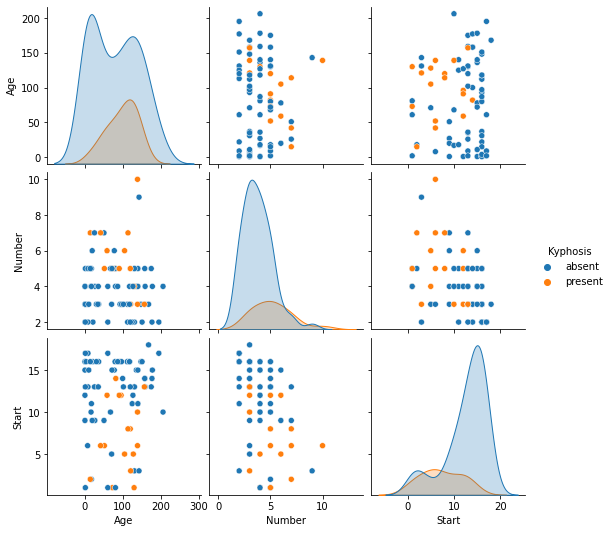

In [74]:
sns.pairplot(load_Kyphosis_data,hue='Kyphosis')

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
y = load_Kyphosis_data['Kyphosis']
X = load_Kyphosis_data[['Age','Number','Start']]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [78]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [79]:
prediction  = dtree.predict(X_test)
prediction

array(['absent', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'absent'], dtype=object)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[14  5]
 [ 6  2]]
              precision    recall  f1-score   support

      absent       0.70      0.74      0.72        19
     present       0.29      0.25      0.27         8

    accuracy                           0.59        27
   macro avg       0.49      0.49      0.49        27
weighted avg       0.58      0.59      0.58        27



In [82]:
# Now we do the same Operation on Random Forest
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators=200)

In [83]:
rfclassifier.fit(X_train,y_train)
predict_= rfclassifier.predict(X_test)

In [84]:
predict_

array(['absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent'], dtype=object)

In [85]:
print(confusion_matrix(predict_,y_test))
print(classification_report(predict_,y_test))

[[19  7]
 [ 0  1]]
              precision    recall  f1-score   support

      absent       1.00      0.73      0.84        26
     present       0.12      1.00      0.22         1

    accuracy                           0.74        27
   macro avg       0.56      0.87      0.53        27
weighted avg       0.97      0.74      0.82        27



# Now We are going to understand tree visualization

In [86]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(load_Kyphosis_data.columns[1:])
features

['Age', 'Number', 'Start']

In [87]:
dot_data = StringIO() 

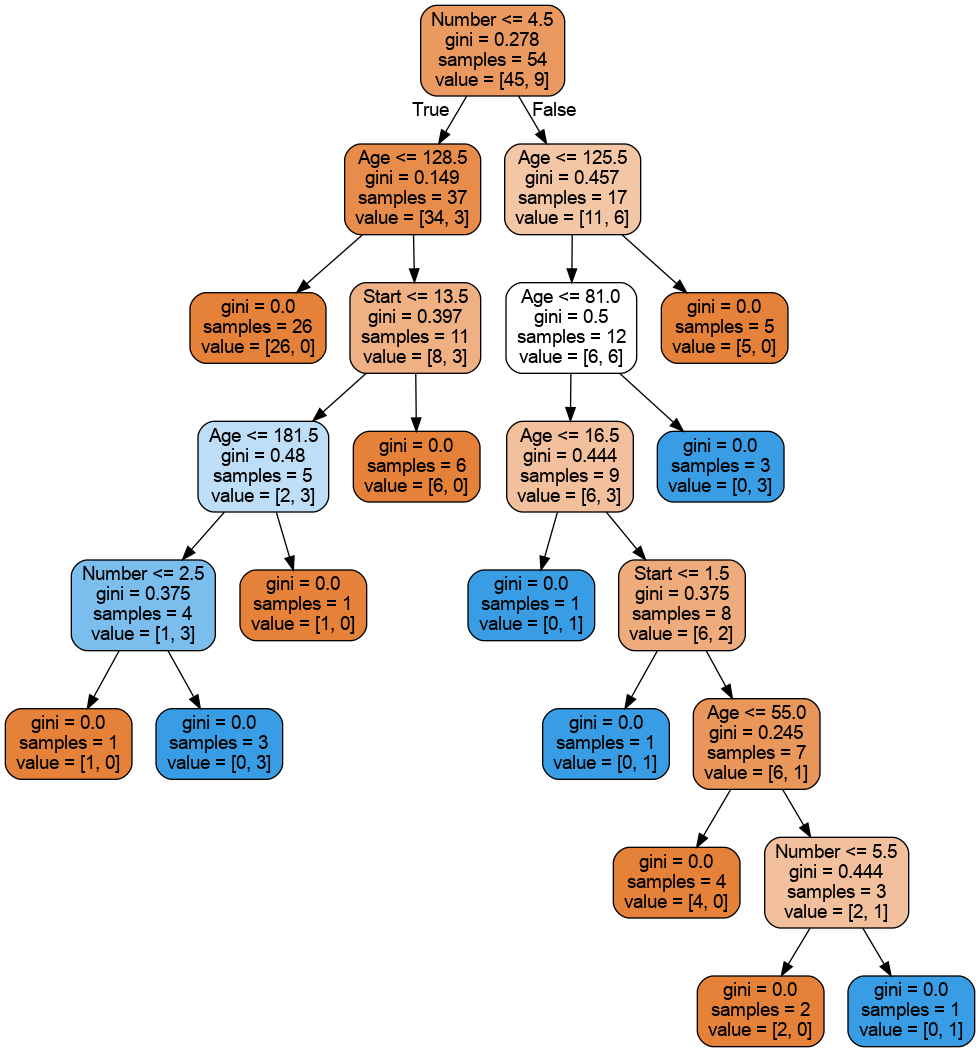

In [88]:
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  